<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/BT_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ---------------------------------------------------------------
# Temperature Controller
#---------------------------------------------------------------------
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

# x-axis
setpoint = ctrl.Antecedent(np.arange(12,33,0.01),'setpoint')
sensor = ctrl.Antecedent(np.arange(-3,61,0.01),'sensor')

pwm = ctrl.Consequent(np.arange(0,256,0.01),'pwm') # out


#================================Draw============================================

setpoint['low']=fuzz.trimf(setpoint.universe,[12, 12, 22])
setpoint['medium']=fuzz.trimf(setpoint.universe,[12, 22, 32])
setpoint['high']=fuzz.trimf(setpoint.universe,[22, 32, 32])

sensor['very_low']=fuzz.trimf(sensor.universe,[-3, -3, 15.75])
sensor['low']=fuzz.trimf(sensor.universe,[-3, 15.75, 31.5])
sensor['medium']=fuzz.trimf(sensor.universe,[15.75, 31.5, 47.25])
sensor['high']=fuzz.trimf(sensor.universe,[31.5, 47.25, 60])
sensor['very_high']=fuzz.trimf(sensor.universe,[47.25, 60, 60])

pwm['very_low']=fuzz.trimf(pwm.universe,[0, 0, 255/2])
pwm['low']=fuzz.trimf(pwm.universe,[0, 255/4, 255/2])
pwm['medium']=fuzz.trimf(pwm.universe,[0, 255/2, 255])
pwm['high']=fuzz.trimf(pwm.universe,[255/2, 3*255/4, 255])
pwm['very_high']=fuzz.trimf(pwm.universe,[255/2, 255, 255])


#================================================================================

# Show
setpoint.view()
sensor.view()
pwm.view()


# Rules
rule1 = ctrl.Rule(setpoint['low'] & sensor['very_low'] , pwm['low'])
rule2 = ctrl.Rule(setpoint['low'] & sensor['low'] , pwm['low'])
rule3 = ctrl.Rule(setpoint['low'] & sensor['medium'] , pwm['very_low'])
rule4 = ctrl.Rule(setpoint['low'] & sensor['high'] , pwm['medium'])
rule5 = ctrl.Rule(setpoint['low'] & sensor['very_high'] , pwm['high'])
rule6 = ctrl.Rule(setpoint['medium'] & sensor['very_low'] , pwm['low'])
rule7 = ctrl.Rule(setpoint['medium'] & sensor['low'] , pwm['very_low'])
rule8 = ctrl.Rule(setpoint['medium'] & sensor['medium'] , pwm['medium'])
rule9 = ctrl.Rule(setpoint['medium'] & sensor['high'] , pwm['medium'])
rule10 = ctrl.Rule(setpoint['medium'] & sensor['very_high'] , pwm['high'])
rule11 = ctrl.Rule(setpoint['high'] & sensor['very_low'] , pwm['low'])
rule12 = ctrl.Rule(setpoint['high'] & sensor['low'] , pwm['medium'])
rule13 = ctrl.Rule(setpoint['high'] & sensor['medium'] , pwm['high'])
rule14 = ctrl.Rule(setpoint['high'] & sensor['high'] , pwm['very_high'])
rule15 = ctrl.Rule(setpoint['high'] & sensor['very_high'] , pwm['very_high'])

#rule = []
#for i in range(1, 16):
#    rule.append(locals()["rule" + str(i)])

# Learn
pwm_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwm1 = ctrl.ControlSystemSimulation(pwm_ctrl)

# Input value
pwm1.input['setpoint'] = 20
pwm1.input['sensor'] = 20

# Caculating
pwm1.compute()

# Output value
print(pwm1.output['pwm'])

# Show
pwm.view(sim = pwm1)

127.5000000000001
127.5000000000001


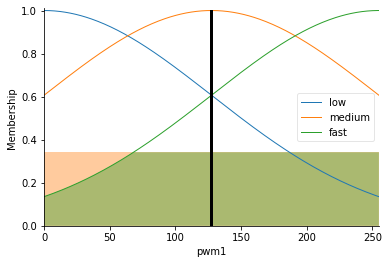

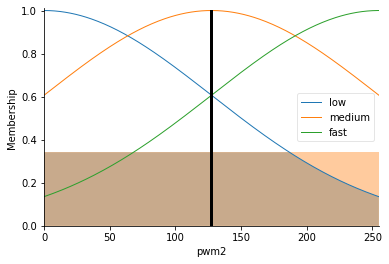

In [36]:
# ---------------------------------------------------------------
# Control mobile robot
#---------------------------------------------------------------------
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

# x-axis
sensor1 = ctrl.Antecedent(np.arange(2,400,0.01),'sensor1')
sensor2 = ctrl.Antecedent(np.arange(2,400,0.01),'sensor2')
sensor3 = ctrl.Antecedent(np.arange(2,400,0.01),'sensor3')
sensor4 = ctrl.Antecedent(np.arange(2,400,0.01),'sensor4')
sensor5 = ctrl.Antecedent(np.arange(2,400,0.01),'sensor5')


pwm1 = ctrl.Consequent(np.arange(0,256,1),'pwm1') # out
pwm2 = ctrl.Consequent(np.arange(0,256,1),'pwm2') # out

#================================Draw============================================

sensor1.automf(3)
sensor2.automf(3)
sensor3.automf(3)
sensor4.automf(3)
sensor5.automf(3)

pwm1['low']=fuzz.gaussmf(pwm1.universe,0, 255/2)
pwm1['medium']=fuzz.gaussmf(pwm1.universe,255/2, 255/2)
pwm1['fast']=fuzz.gaussmf(pwm1.universe,255, 255/2)

pwm2['low']=fuzz.gaussmf(pwm2.universe,0, 255/2)
pwm2['medium']=fuzz.gaussmf(pwm2.universe,255/2, 255/2)
pwm2['fast']=fuzz.gaussmf(pwm2.universe,255, 255/2)


#================================================================================

# Show
#sensor1.view()
#sensor2.view()
#sensor3.view()
#sensor4.view()
#sensor5.view()

# Rules
# sensor1 ,pw1 ben trai
# sensor5 ,pw2 ben phai
rule1 = ctrl.Rule(sensor1['average'] | sensor2['average'] | sensor3['average'] | sensor4['average'] | sensor5['average'], (pwm1['fast'], pwm2['low'])) 

rule3 = ctrl.Rule(sensor1['good'] , (pwm1['fast'], pwm2['fast']))
rule4 = ctrl.Rule(sensor2['good'] , (pwm1['fast'], pwm2['fast']))
rule5 = ctrl.Rule(sensor3['good'] , (pwm1['fast'], pwm2['fast']))
rule6 = ctrl.Rule(sensor4['good'] , (pwm1['fast'], pwm2['fast']))
rule7 = ctrl.Rule(sensor5['good'] , (pwm1['fast'], pwm2['fast']))

rule8 = ctrl.Rule(sensor1['average'] , (pwm1['medium'], pwm2['medium']))
rule9 = ctrl.Rule(sensor2['average'] , (pwm1['medium'], pwm2['medium']))
rule10 = ctrl.Rule(sensor3['average'] , (pwm1['medium'], pwm2['medium']))
rule11 = ctrl.Rule(sensor4['average'] , (pwm1['medium'], pwm2['medium']))
rule12 = ctrl.Rule(sensor5['average'] , (pwm1['medium'], pwm2['medium']))

#rule = []
#for i in range(1, 16):
#    rule.append(locals()["rule" + str(i)])

# Learn
pwm_ctrl = ctrl.ControlSystem([rule1,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
pwm10 = ctrl.ControlSystemSimulation(pwm_ctrl)
pwm20 = ctrl.ControlSystemSimulation(pwm_ctrl)

# Input value
pwm10.input['sensor1'] = 20
pwm10.input['sensor2'] = 30
pwm10.input['sensor3'] = 60
pwm10.input['sensor4'] = 50
pwm10.input['sensor5'] = 70

pwm20.input['sensor1'] = 20
pwm20.input['sensor2'] = 30
pwm20.input['sensor3'] = 60
pwm20.input['sensor4'] = 50
pwm20.input['sensor5'] = 70

# Caculating
pwm10.compute()
pwm20.compute()

# Output value
print(pwm10.output['pwm1'])
print(pwm20.output['pwm2'])

# Show
pwm1.view(sim = pwm10)
pwm2.view(sim = pwm20)